# Metropolis Hastings

En esta sección vamos a ver tres métodos diferentes para generar una muestra de
puntos que sigan una distribución determinada y así motivar el uso del algoritmo Metropolis-Hastings
La función de distribución que vamos a utilizar es $\frac{1}{2}\sin(x)$ en el intervalo $0<x<\pi$.

Primero vamos a visualizar la forma de esta función

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
n_puntos=1000
x = np.linspace(0, np.pi)
def f(x):
    y = 0.5 * np.sin(x)
    if(np.isscalar(x)):# esto va a funcionar si entra un numero
        if (x>np.pi) | (x<0):
            y = 0
    else: #esto va a funcionar si entra un array
        ii = (x>np.pi) | (x<0)
        y[ii] = 0.0
    return y

Text(0,0.5,'PDF(x)')

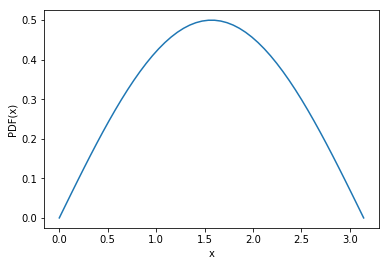

In [3]:
plt.plot(x, f(x))
plt.xlabel('x')
plt.ylabel('PDF(x)')

# Fuerza Bruta (selección por rechazo)

El primer método que vamos a utlizar para generar $N$ puntos que sigan esta distribución es fuerza bruta.

Vamos a generar un punto $x_i$ de una distribución uniforme entre $0$ y $\pi$. Luego para cada punto $x_i$ generamos un segundo n\'umero aleatorio $y_i$ de una distribuci\'on uniforme entre $0$ y el m\'aximo de $f(x)$ (que en este caso es 0.5) y nos preguntamos si $y_i<f(x_i)$; en caso afirmativo entonces incluimos a $x_i$ en la lista, en caso negativo descartamos a $x_i$.

Escrito en código este metodo se ve asi

In [22]:
N = 100000

n_adentro = 0
n_intentos = 0
lista = []
while n_adentro < N:
    x_i = np.random.random()*np.pi
    y_i = np.random.random()*1/2
    n_intentos += 1
    if(y_i < f(x_i)):
        lista.append(x_i)
        n_adentro +=1 

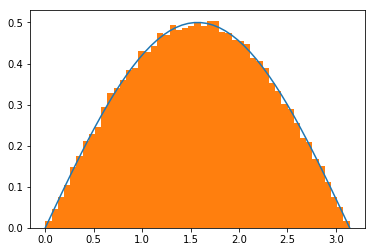

In [23]:
plt.plot(x, f(x))
_ = plt.hist(lista, density=True, bins=x)

El problema es que tuvimos que generar muchos mas numeros (`n_intentos`) de los que al final 
terminaron en la lista `n_adentro`

In [24]:
print(n_adentro/n_intentos)

0.6364683643399505


# Integración analítica

El segundo método utiliza la integral cumulativa  $g(x) = \int_0^x f(y)dy$ que por definición se
encuentra entre 0 y 1. En nuestro ejemplo tenemos $g(x)=-\frac{1}{2}\cos(x) + \frac{1}{2}$

In [25]:
def cumul_f(x):
    return - 0.5 * np.cos(x) + 0.5

Text(0,0.5,'PDF(x) cumulativa')

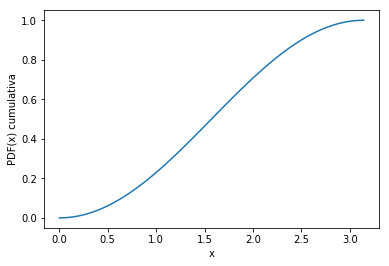

In [26]:
plt.plot(x, cumul_f(x))
plt.xlabel('x')
plt.ylabel('PDF(x) cumulativa')

Si generamos puntos $z_i$ con una distribucion uniforme entre 0 y 1, y calculamos $x_i=g^{-1}(z_i)$ todos los $x_i$ van a seguir la distribucion $f(x)$.

En nuestro caso $g^{-1}(x)$ es $\arccos(-2.0(x-\frac{1}{2}))$

In [27]:
def inversa_cumul_f(x):
    return np.arccos(-2.0*(x-0.5))

Text(0,0.5,'Inversa de la PDF(x) cumulativa')

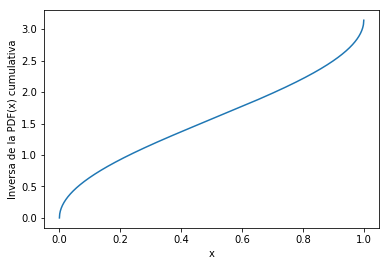

In [28]:
z = np.linspace(0,1.0, n_puntos)
plt.plot(z, inversa_cumul_f(z))
plt.xlabel('x')
plt.ylabel('Inversa de la PDF(x) cumulativa')

In [29]:
#De esta manera solamente tenemos que calcular

N = 100000
z = np.random.random(N)
lista = inversa_cumul_f(z)

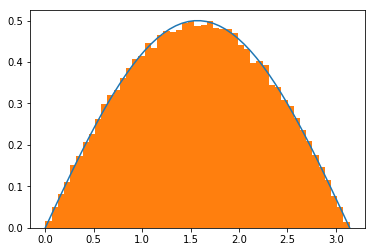

In [30]:
plt.plot(x, f(x))
_ = plt.hist(lista, density=True, bins=x)

La desventaja de este metodo es que solamente es util si podemos integrar e invertir analiticamente la funcion de distribucion.

# Metropolis Hastings

Este algoritmo evita los problemas de los dos metodos anteriores.
Primero, para generar N no voy a desperdiciar intentos; y segundo, no voy a necesitar una integral 
analitica de la distribución que necesito muestrear.

En este algoritmo tengos los siguiente pasos:

0. empiezo con un número aleatorio $x_1$ que se encuentra en el rango de la PDF (puede venir de una distribución uniforme.)
1. propongo un número $x_{2}$ que viene de $x_{1}$ pero con un salto $\delta x$, $x_{2}=x_{1}+\delta_x$. Usualmente este $\delta_x$ es un número aleatorio que viene de una gaussiana centrada en cero y desviación estándar $\sigma$. 
2. Comparo la función de distribución en los dos puntos $r=f(x_{2})/f(x_{1})$.
3. Genero  un número aleatorio $\alpha$ de una distribución uniforme entre 0 y 1.
4. Comparo $\alpha$ con $r$, si $\alpha>r$ entonces incluyo el punto $x_2$ en mi lista, en el caso contrario incluyo a $x_{1}$ en la lista. 

Los pasos 1 a 4 se repiten hasta tener $N$ puntos en mi lista.

Escrito en código tenemos lo siguiente:

In [31]:
N = 100000
lista = [np.random.random()*np.pi]
sigma_delta = 1.0

for i in range(1,N):
    propuesta  = lista[i-1] + np.random.normal(loc=0.0, scale=sigma_delta)
    r = min(1,f(propuesta)/f(lista[i-1]))
    alpha = np.random.random()
    if(alpha<r):
        lista.append(propuesta)
    else:
        lista.append(lista[i-1])

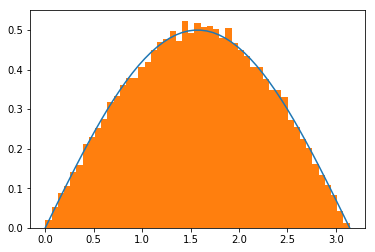

In [32]:
plt.plot(x, f(x))
_ = plt.hist(lista, density=True, bins=x)

# Ejercicio 7.1

Muestree con Metrópolis Hastings la misma distribución que hemos venido utilizando hasta ahora en dos condiciones diferentes:

1. `sigma_delta=0.001`
2. `sigma_delta=1000.0`

Prepare gráficas para los dos casos. ¿Cómo explicaría la diferencia entre las dos situaciones?

# Ejercicio 7.2 - Metropolis-Hastings en dos dimensiones

Podemos pensar ahora en una distribución de probabilidad en dos dimensiones $f(x,y)=\exp\left( -\frac{1}{2}(x^2 + \frac{y^2}{9} - \frac{xy}{12}) \right)$.

Abajo tiene un ejemplo para visualizar esta función de distribución en 2D (izquierda)
y cómo visualizar el histograma 2D de una distribución de puntos aleatoria (que **no** sigue la distribución propuesta).

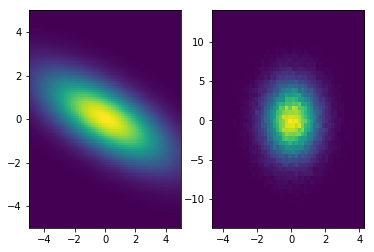

In [33]:
def dens(x, y):
    return np.exp(-0.5*(x**2/4 + y**2 +x*y/1.5))


N=100000
# Genera puntos sobre una grid
x_line = np.linspace(-5,5,100)
y_line = np.linspace(-5,5,100)
x_grid, y_grid = np.meshgrid(x_line, y_line)
z_grid = dens(x_grid, y_grid)

# Genera lista de puntos
x_lista = np.random.normal(size=N)
y_lista = np.random.normal(scale=3.0, size=N)

fig, (ax0, ax1) = plt.subplots(1,2)

# grafica los puntos de la grid
im = ax0.pcolormesh(x_grid, y_grid, z_grid)

# grafica el histograma bidimensional a partir de la lista de puntos
_ = plt.hist2d(x_lista, y_lista, bins=50)

Escriba el código necesario para muestrar esta distribución en dos dimensiones.